<a href="https://colab.research.google.com/github/szh141/QI-2024/blob/main/confocal_SNR_and_resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

confocal doesn't improve resolution when pinhole is above 1 A.U.

but it removes out of focus light which compromises the achievable resolution. Those out of focus light increase the background, and Poisson noise burying the resolution.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, filters

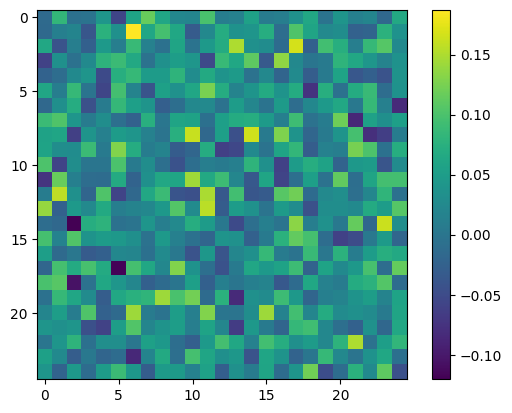

In [ ]:
a = np.random.normal(0.03,0.05,test.shape)
plt.imshow(a)
plt.colorbar()

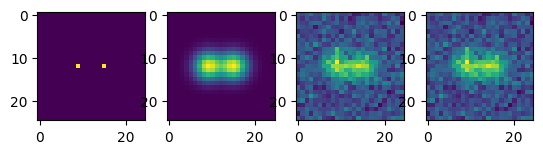

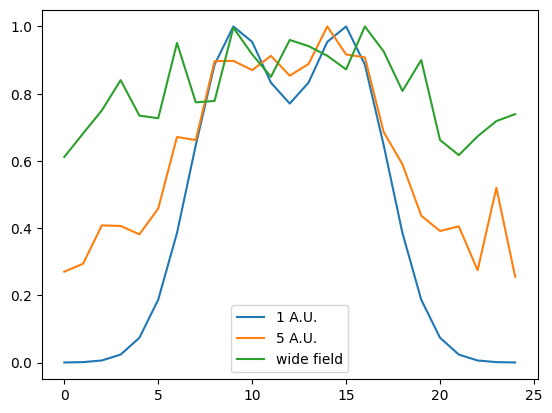

In [60]:
test = np.zeros((25,25))
test[12,15] = 1
test[12,9] = 1

np.random.seed(42)

plt.subplot(141)
plt.imshow(test)
plt.subplot(142)
test_blur = filters.gaussian(test,sigma = 2.2)
plt.imshow(test_blur)
plt.subplot(143)
out_of_focus = test_blur + np.random.normal(0.02,0.005,test.shape)
plt.imshow(out_of_focus)
plt.subplot(144)
out_of_focus_2 = test_blur + np.random.normal(0.1,0.01,test.shape)
plt.imshow(out_of_focus)
plt.show()

plt.plot(np.arange(test.shape[0]),test_blur[12]/test_blur[12].max(),label='1 A.U.')
plt.plot(np.arange(test.shape[0]),out_of_focus[12]/out_of_focus[12].max(),label='5 A.U.')
plt.plot(np.arange(test.shape[0]),out_of_focus_2[12]/out_of_focus_2[12].max(),label='wide field')
plt.legend()

In [4]:
PSF_BW = io.imread('/content/drive/MyDrive/Colab images/PSF BW.tif')
print(PSF_BW.shape)
psf = PSF_BW[15:50,120:136,120:136]

(65, 256, 256)


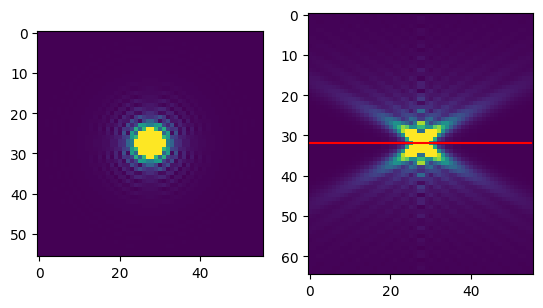

In [33]:
plt.subplot(121)
plt.imshow(PSF_BW[32,100:156,100:156],vmax=0.01)
plt.subplot(122)
plt.imshow(PSF_BW[:,128,100:156],vmax=0.05)
plt.plot(np.arange(56),np.ones(56)*32,c='red')
plt.show()